<a href="https://colab.research.google.com/github/anazantoro/Project-PersonalizedLearningPath/blob/main/V2_Notebook_Predict_Personalized_Student_Learning_Category_SimpleRNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Dependencies Version

In [2]:
print("Python Version:", sys.version)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("TensorFlow Version:", tf.__version__)

Python Version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
NumPy Version: 2.0.2
Pandas Version: 2.2.2
Scikit-learn Version: 1.6.1
TensorFlow Version: 2.18.0


# Load Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/anazantoro/Project-PersonalizedLearningPath/refs/heads/main/Dataset/students_personalized_scoring_1000_balanced.csv")

# Pre-processing

In [4]:
X = data.iloc[:, :-1].values  # Ambil semua kolom skor
y = np.argmax(X, axis=1)      # Label = index skor tertinggi

In [17]:
# --- NORMALISASI ---
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# --- SPLIT DATA ---
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

# --- SMOTE (untuk mengatasi ketimpangan kelas) ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- RESHAPE UNTUK RNN ---
X_train_reshaped = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_sparse = y_train_smote
y_test_sparse = y_test

In [22]:
X_train_reshaped.shape

(594, 1, 11)

# Modelling

In [25]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, 11)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_reshaped,
    y_train_sparse,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_reshaped, y_test_sparse)
)


Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.1055 - loss: 2.4092 - val_accuracy: 0.1871 - val_loss: 2.3625
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1296 - loss: 2.3738 - val_accuracy: 0.2374 - val_loss: 2.3235
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1883 - loss: 2.3252 - val_accuracy: 0.2734 - val_loss: 2.2744
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2392 - loss: 2.2675 - val_accuracy: 0.3165 - val_loss: 2.2196
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3085 - loss: 2.2256 - val_accuracy: 0.3381 - val_loss: 2.1448
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3415 - loss: 2.1180 - val_accuracy: 0.3741 - val_loss: 2.0584
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3471 - loss: 2.0463 - val_accuracy: 0.4604 - val_loss: 1.9769
Epoch 8/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3635 - loss: 1.9914 - val_accuracy: 0.4460 - 

# Training

# Evaluation

In [26]:
categories = ['UI/UX', 'Programming', 'Operational', 'Data Science', 'Cybersecurity',
              'Quality Assurance', 'Computer Network', 'Project Management',
              'Product Manager', 'Entrepreneur', 'Business/Commerce/Ideation']

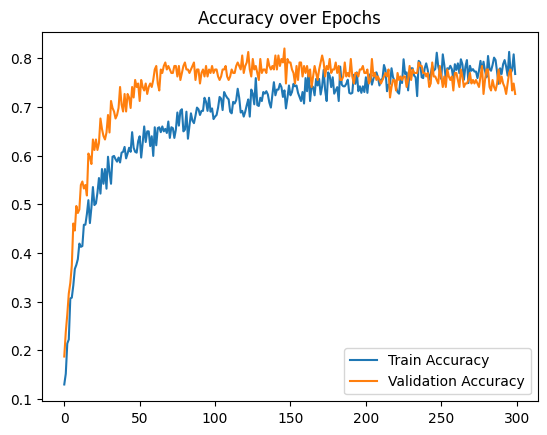

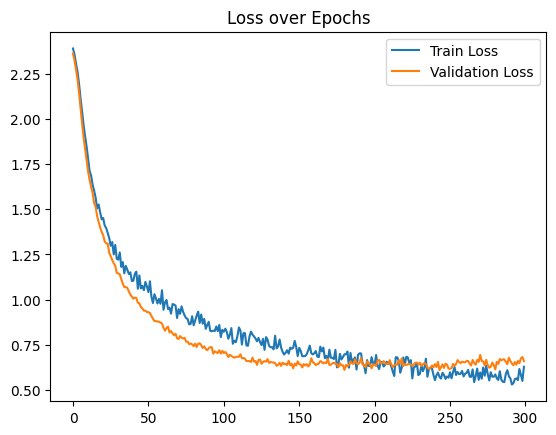

In [27]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


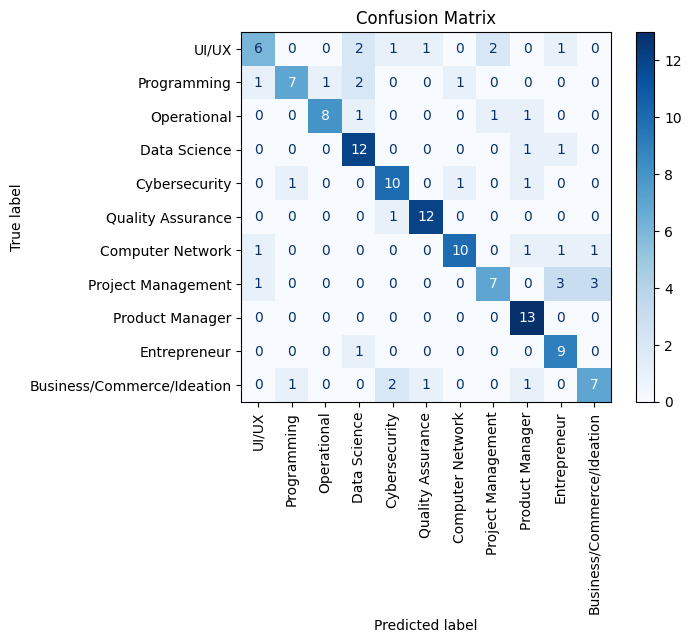

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Testing Model

Masukkan skor untuk masing-masing kategori (0.0 - 1.0):
UI/UX: 0.2
Programming: 0.5
Operational: 0.6
Data Science: 0.3
Cybersecurity: 0.7
Quality Assurance: 0.5
Computer Network: 0.6
Project Management: 0.2
Product Manager: 0.4
Entrepreneur: 0.2
Business/Commerce/Ideation: 0.1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Top-3 Predictions:
Operational: 0.4517
Cybersecurity: 0.3598
Computer Network: 0.1579


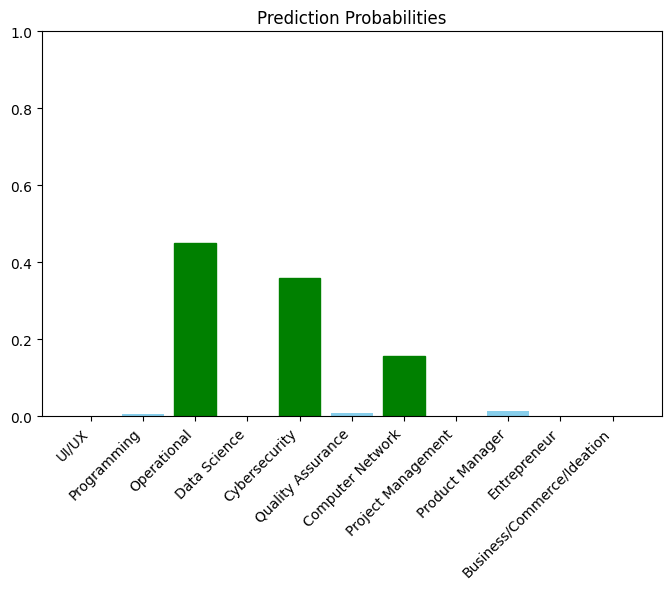

In [31]:
def predict_and_show(new_data, model, categories, top_k=3):
    new_data = np.expand_dims(new_data, axis=1)
    prediction = model.predict(new_data)[0]
    sorted_indices = prediction.argsort()[::-1]

    print(f"\nTop-{top_k} Predictions:")
    for i in range(top_k):
        idx = sorted_indices[i]
        print(f"{categories[idx]}: {prediction[idx]:.4f}")

    # Optional: Plot
    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, prediction, color='skyblue')
    for i, bar in enumerate(bars):
        if i in sorted_indices[:top_k]:
            bar.set_color('green')
    plt.title("Prediction Probabilities")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.show()

# Fungsi untuk input manual skor
def manual_input():
    scores = []
    print("Masukkan skor untuk masing-masing kategori (0.0 - 1.0):")
    for category in categories:
        while True:
            try:
                value = float(input(f"{category}: "))
                if 0.0 <= value <= 1.0:
                    scores.append(value)
                    break
                else:
                    print("Masukkan angka antara 0.0 sampai 1.0!")
            except ValueError:
                print("Masukkan angka yang valid!")
    return np.array([scores])

# Fungsi prediksi
def predict_and_show_manual_input(model):
    user_input = manual_input()
    predict_and_show(user_input, model, categories)

# Panggil fungsi ini untuk mulai input
predict_and_show_manual_input(model)

In [ ]:
# predict_and_show(np.zeros((1, 11)), model, categories)

# Save Model

In [ ]:
# model.save("model.h5")